In [45]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.inspection import permutation_importance
from sklearn.impute import KNNImputer

In [46]:
df=pd.read_parquet('../data/interim/Breastnooutliers.parquet')

In [47]:
df.dtypes

perimeter_se               float64
radius_worst               float64
concave points_mean        float64
smoothness_mean            float64
area_mean                  float64
concavity_se               float64
texture_mean               float64
concavity_worst            float64
smoothness_se              float64
concave points_se          float64
area_worst                 float64
compactness_mean           float64
radius_mean                float64
area_se                    float64
concave points_worst       float64
fractal_dimension_worst    float64
perimeter_worst            float64
texture_se                 float64
fractal_dimension_mean     float64
texture_worst              float64
smoothness_worst           float64
concavity_mean             float64
symmetry_mean              float64
symmetry_worst             float64
diagnosis                  float64
fractal_dimension_se       float64
perimeter_mean             float64
compactness_worst          float64
symmetry_se         

In [48]:
df['diagnosis']=df["diagnosis"].astype("category")

In [49]:
# se toman todas las columnas menos sobreviviente, que es la clase
X = df.drop('diagnosis', axis=1)
# se selecciona la columna de la clase
y = df['diagnosis']
# Split dataset into training set and test set
#random_state generador de numero aleatorios (semilla usada por el generador)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,shuffle=True) # 70% training and 30% test

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # Import train_test_split function

tipificado = StandardScaler().fit(X_train)
standardized_X = tipificado.transform(X_train)
standardized_X_test = tipificado.transform(X_test)

In [59]:
X_train

,perimeter_se,radius_worst,concave points_mean,smoothness_mean,area_mean,concavity_se,texture_mean,concavity_worst,smoothness_se,concave points_se,...,smoothness_worst,concavity_mean,symmetry_mean,symmetry_worst,fractal_dimension_se,perimeter_mean,compactness_worst,symmetry_se,compactness_se,radius_se
249,1968.00,12.36,0.01076,0.10180,380.3,0.006972,21.41,0.03582,0.006908,0.006159,...,0.12820,0.008955,0.1615,0.2976,0.002060,70.95,0.1108,0.02694,0.009442,0.2865
58,1143.00,17.01,0.06211,0.10430,747.2,0.033360,11.28,0.40040,0.006034,0.010670,...,0.15410,0.119100,0.1784,0.2557,0.002256,102.80,0.2979,0.01175,0.018200,NaN
476,5173.00,22.75,0.11030,0.09797,1194.0,0.043450,21.68,0.47340,0.004756,0.018060,...,0.12180,0.186300,0.2082,0.4045,0.003288,129.90,0.3458,NaN,0.033680,0.6226
529,3399.00,15.30,0.07798,0.07837,629.9,NaN,19.65,0.67830,0.005298,0.022920,...,0.08949,0.300300,0.1704,0.2398,NaN,97.83,0.4193,0.02566,NaN,0.3628
422,10.12,19.85,0.13770,0.11090,773.5,0.082320,23.20,0.61810,0.012360,NaN,...,0.15040,NaN,0.2495,0.3277,0.006042,110.20,0.5172,0.02337,0.059950,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,1115.00,13.62,0.01171,0.06955,515.9,0.016520,13.12,0.11860,0.004731,0.005905,...,0.09616,0.022600,0.1337,0.2309,0.002081,81.89,0.1147,0.01619,0.013450,0.1532
144,1303.00,12.77,0.01777,0.08508,412.7,0.020800,18.36,NaN,0.006709,0.007497,...,0.13420,0.033670,0.1516,NaN,0.002768,73.88,0.1808,0.02124,0.017010,0.1816
72,2735.00,17.87,0.08123,0.11370,656.9,0.025720,21.59,0.35870,0.003659,0.012720,...,0.13680,0.129300,0.2027,0.3698,0.004108,95.55,NaN,0.01817,0.028550,0.4226
235,3909.00,19.20,0.09176,0.13230,597.8,0.031120,23.75,0.46460,0.008824,0.012910,...,NaN,0.155800,0.2251,0.4432,0.004506,91.56,0.5209,0.01998,0.031080,0.5648


In [52]:
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train),columns = X_train.columns)
X_train_imputed

,perimeter_se,radius_worst,concave points_mean,smoothness_mean,area_mean,concavity_se,texture_mean,concavity_worst,smoothness_se,concave points_se,...,smoothness_worst,concavity_mean,symmetry_mean,symmetry_worst,fractal_dimension_se,perimeter_mean,compactness_worst,symmetry_se,compactness_se,radius_se
0,1968.00,12.36,0.01076,0.10180,380.3,0.006972,21.41,0.03582,0.006908,0.006159,...,0.12820,0.008955,0.1615,0.29760,0.002060,70.95,0.11080,0.02694,0.009442,0.28650
1,1143.00,17.01,0.06211,0.10430,747.2,0.033360,11.28,0.40040,0.006034,0.010670,...,0.15410,0.119100,0.1784,0.25570,0.002256,102.80,0.29790,0.01175,0.018200,0.18706
2,5173.00,22.75,0.11030,0.09797,1194.0,0.043450,21.68,0.47340,0.004756,0.018060,...,0.12180,0.186300,0.2082,0.40450,0.003288,129.90,0.34580,0.02445,0.033680,0.62260
3,3399.00,15.30,0.07798,0.07837,629.9,0.046628,19.65,0.67830,0.005298,0.022920,...,0.08949,0.300300,0.1704,0.23980,0.003573,97.83,0.41930,0.02566,0.029838,0.36280
4,10.12,19.85,0.13770,0.11090,773.5,0.082320,23.20,0.61810,0.012360,0.016038,...,0.15040,0.136856,0.2495,0.32770,0.006042,110.20,0.51720,0.02337,0.059950,0.67294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,1115.00,13.62,0.01171,0.06955,515.9,0.016520,13.12,0.11860,0.004731,0.005905,...,0.09616,0.022600,0.1337,0.23090,0.002081,81.89,0.11470,0.01619,0.013450,0.15320
394,1303.00,12.77,0.01777,0.08508,412.7,0.020800,18.36,0.34766,0.006709,0.007497,...,0.13420,0.033670,0.1516,0.27898,0.002768,73.88,0.18080,0.02124,0.017010,0.18160
395,2735.00,17.87,0.08123,0.11370,656.9,0.025720,21.59,0.35870,0.003659,0.012720,...,0.13680,0.129300,0.2027,0.36980,0.004108,95.55,0.34972,0.01817,0.028550,0.42260
396,3909.00,19.20,0.09176,0.13230,597.8,0.031120,23.75,0.46460,0.008824,0.012910,...,0.13400,0.155800,0.2251,0.44320,0.004506,91.56,0.52090,0.01998,0.031080,0.56480


In [53]:
matriz_correlacion = X_train_imputed.corr(method='pearson')
matriz_correlacion

,perimeter_se,radius_worst,concave points_mean,smoothness_mean,area_mean,concavity_se,texture_mean,concavity_worst,smoothness_se,concave points_se,...,smoothness_worst,concavity_mean,symmetry_mean,symmetry_worst,fractal_dimension_se,perimeter_mean,compactness_worst,symmetry_se,compactness_se,radius_se
perimeter_se,1.000000,0.517783,0.491947,0.156799,0.544228,0.301230,0.246695,0.344714,0.108258,0.427047,...,0.135953,0.467278,0.239670,0.175817,0.246518,0.518051,0.258309,0.147337,0.281823,0.657841
radius_worst,0.517783,1.000000,0.768890,0.191362,0.888148,0.379181,0.329591,0.562758,-0.177186,0.415878,...,0.218905,0.683386,0.189859,0.254884,0.106437,0.882783,0.479243,-0.159898,0.301261,0.709170
concave points_mean,0.491947,0.768890,1.000000,0.531962,0.768036,0.590883,0.292583,0.723947,0.056556,0.661452,...,0.424431,0.877392,0.453938,0.364871,0.339012,0.806756,0.659377,-0.033999,0.545973,0.720013
smoothness_mean,0.156799,0.191362,0.531962,1.000000,0.135442,0.312532,-0.009799,0.387248,0.309079,0.387979,...,0.710324,0.452209,0.480207,0.391054,0.345508,0.173870,0.428428,0.075537,0.359515,0.307399
area_mean,0.544228,0.888148,0.768036,0.135442,1.000000,0.361675,0.353570,0.546812,-0.202113,0.404102,...,0.149158,0.670140,0.166658,0.203323,0.064619,0.985283,0.435603,-0.192021,0.293928,0.674267
concavity_se,0.301230,0.379181,0.590883,0.312532,0.361675,1.000000,0.279527,0.680534,0.242507,0.695273,...,0.243489,0.693464,0.323718,0.174814,0.599530,0.401835,0.632062,0.097512,0.811837,0.421603
texture_mean,0.246695,0.329591,0.292583,-0.009799,0.353570,0.279527,1.000000,0.297779,0.109504,0.196269,...,0.069296,0.319827,0.090781,0.064176,0.165497,0.353296,0.245876,0.040940,0.261276,0.352801
concavity_worst,0.344714,0.562758,0.723947,0.387248,0.546812,0.680534,0.297779,1.000000,-0.008769,0.531095,...,0.447355,0.815897,0.404382,0.435167,0.360380,0.590783,0.789464,-0.126231,0.585110,0.424661
smoothness_se,0.108258,-0.177186,0.056556,0.309079,-0.202113,0.242507,0.109504,-0.008769,1.000000,0.295961,...,0.330499,0.058699,0.226102,-0.017183,0.381967,-0.210039,0.000876,0.357959,0.293979,0.146098
concave points_se,0.427047,0.415878,0.661452,0.387979,0.404102,0.695273,0.196269,0.531095,0.295961,1.000000,...,0.253893,0.673923,0.310325,0.141235,0.509594,0.436666,0.543705,0.147393,0.666626,0.535415


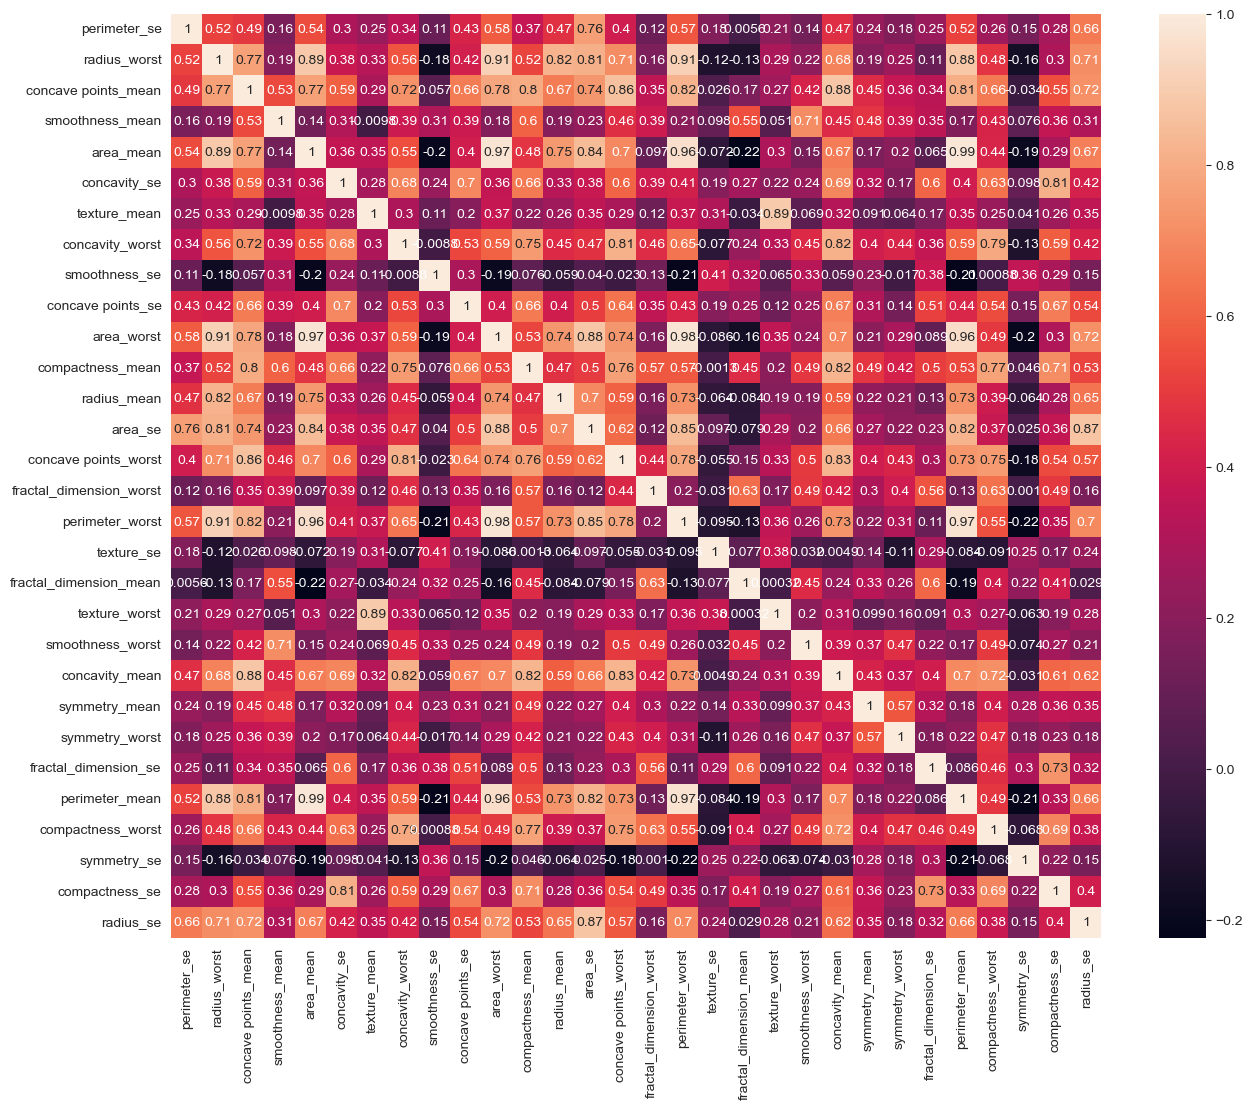

In [54]:
# se construye un mapa de calor a partir de la matriz de correlación
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(matriz_correlacion, annot=True);

In [55]:
imputer = KNNImputer(n_neighbors=5)
X_test_imputed = pd.DataFrame(imputer.fit_transform(X_test),columns = X_test.columns)
X_test_imputed

,perimeter_se,radius_worst,concave points_mean,smoothness_mean,area_mean,concavity_se,texture_mean,concavity_worst,smoothness_se,concave points_se,...,smoothness_worst,concavity_mean,symmetry_mean,symmetry_worst,fractal_dimension_se,perimeter_mean,compactness_worst,symmetry_se,compactness_se,radius_se
0,3926.0000,13.320,0.037380,0.10890,419.8,0.041670,20.180,0.195600,0.009433,0.011520,...,0.13580,0.068430,0.19930,0.3168,0.005061,76.10,0.18920,0.03397,0.024050,0.50180
1,5203.0000,23.690,0.097910,0.09780,1261.0,0.039500,28.250,0.321500,0.005769,0.016780,...,0.11660,0.140174,0.17520,0.2572,0.002498,131.20,0.19220,0.01898,0.024230,0.76550
2,0.9975,13.860,0.023900,0.09879,507.6,0.016130,16.170,0.220300,0.002887,0.007308,...,0.11720,0.032960,0.17350,0.3297,0.001972,83.18,0.19580,0.01870,0.012850,0.14580
3,4174.0000,18.510,0.065530,0.10240,716.6,0.049120,25.740,0.402900,0.010520,0.017460,...,0.14718,0.123500,0.16470,0.2654,0.004867,98.00,0.23560,0.02120,0.024310,0.65340
4,2363.0000,19.960,0.058430,0.08923,1102.0,0.026230,19.980,0.369300,0.007571,0.014630,...,0.12430,0.080200,0.16720,0.2567,0.001676,120.90,0.23014,0.01930,0.011140,0.32830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,3.0700,17.390,0.091940,0.10260,815.8,0.080790,19.510,0.589700,0.009197,0.022150,...,0.13770,0.223600,0.21510,0.3318,0.006355,109.80,0.44620,0.02773,0.054700,0.31470
167,1286.0000,15.980,0.019390,0.08421,690.2,0.008268,19.760,0.077500,0.003634,0.006432,...,0.10450,0.019470,0.15150,0.2646,0.001520,95.50,0.09995,0.01924,0.007983,0.22244
168,1.7400,14.110,0.022720,0.09172,470.9,0.018260,16.520,0.170300,0.004854,0.007965,...,0.11760,0.033720,0.17278,0.2618,0.002304,79.19,0.18430,0.01386,0.018190,0.25050
169,1734.9660,18.374,0.086460,0.09469,820.0,0.021430,22.478,0.344200,0.004551,0.009280,...,0.14010,0.136700,0.17690,0.2868,0.002299,135.70,0.26440,0.01367,0.014780,0.59478


In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # Import train_test_split function

tipificado = StandardScaler().fit(X_train_imputed)
standardized_X = tipificado.transform(X_train_imputed)
standardized_X_test = tipificado.transform(X_test)

In [57]:
seed =2
models = []

#logistic Regression
models.append(('LR', LogisticRegression(solver='liblinear')))

# Decision Tree classifier
models.append(('CART', DecisionTreeClassifier()))

# Naïve Bayes
models.append(('NB', GaussianNB()))
# SVM
models.append(('SVM', SVC(C=1.0, kernel='rbf', max_iter=1000, tol=1e-3)))
# evaluate each model in turn
results = []
names = []
scoring = 'recall'
for name, model in models:
	# Kfol cross validation for model selection
	kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
	#X train , y train
	cv_results = model_selection.cross_val_score(model, X_train_imputed, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = f"({name}, {cv_results.mean()}, {cv_results.std()}"
	print(msg)

(LR, 0.8932469066021698, 0.06992832546275127
(CART, 0.9092976102844524, 0.05650927674951668
(NB, 0.8693940927493559, 0.0787093249298512
(SVM, 0.7427896883817937, 0.07842643479122102


In [58]:
result_df = pd.DataFrame(results, index=names).T
px.box(result_df,title = 'Algorithm Comparison')

In [60]:
#priors calculation
y.value_counts()/len(y)

0.0    0.627417
1.0    0.372583
Name: diagnosis, dtype: float64

In [61]:
a,b = y.value_counts()/len(y)

In [63]:
parameters = {'priors': [None, [a,b]]}

grid_search = GridSearchCV(GaussianNB(), parameters, cv=10, return_train_score=True)
grid_search.fit(X_train_imputed, y_train)

grid_search.best_params_

{'priors': None}

In [65]:
LR = DecisionTreeClassifier()
LR.fit(X_train_imputed,y_train)
y_pred = LR.predict(X_test_imputed)

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       105
         1.0       0.97      0.85      0.90        66

    accuracy                           0.93       171
   macro avg       0.94      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171



C:\Users\CAMARA22\miniconda3\envs\project1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



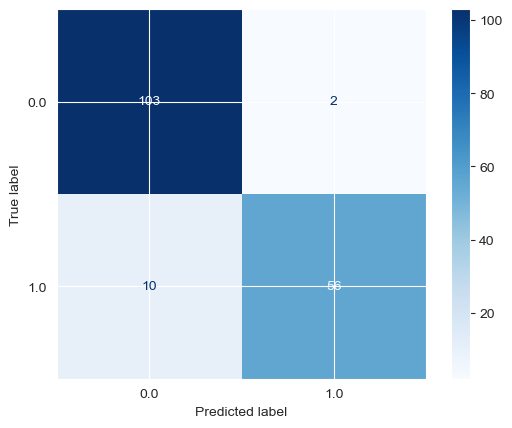

In [67]:
plot_confusion_matrix(LR, X_test_imputed, y_test,cmap=plt.cm.Blues);

In [68]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp+fn)
sensitivity

0.8484848484848485